# problem statement - to predict price of car based on 

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

 # importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import pickle


In [2]:
cdata= pd.read_csv("car data.csv")

In [3]:
cdata.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
cdata.shape

(301, 9)

In [5]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
cdata.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### Checking Null values

In [7]:
cdata.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

###  we are predicting selling price of car  based on various feature that will contribute to price prediction

# EDA

In [8]:
x = datetime.datetime.now()
cdata['car_age']=x.year-cdata['Year']

cdata.drop('Year',axis=1,inplace=True)
cdata.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


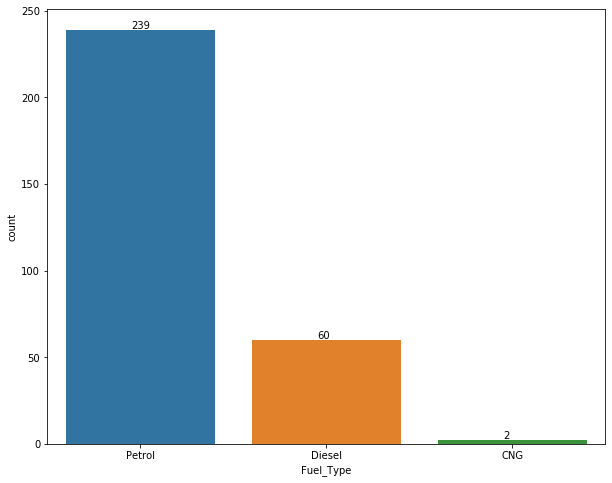

In [9]:

plt.figure(figsize=(10,8))
ax =sns.countplot(cdata.Fuel_Type )
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+1))

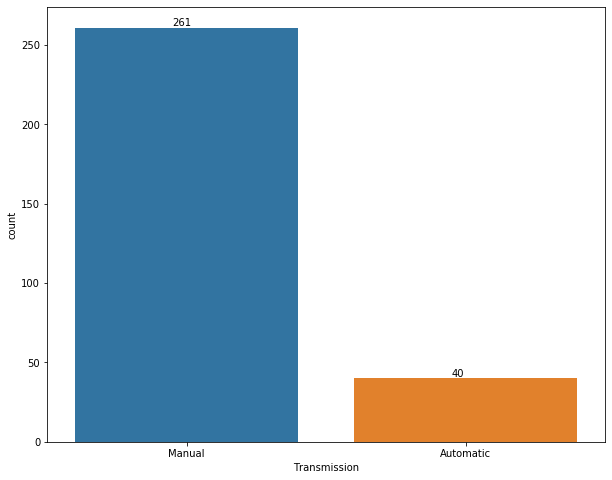

In [10]:
plt.figure(figsize=(10,8))
ax =sns.countplot(cdata.Transmission)
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+1))

In [11]:
k=cdata.Seller_Type.value_counts()


Text(0.5, 1.0, 'No of sellers Individual vs Dealer')

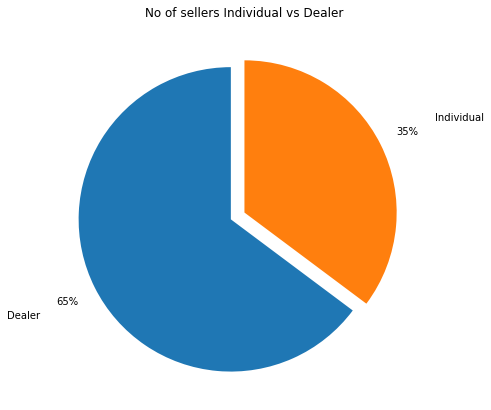

In [12]:
fig, ax = plt.subplots(figsize=(7,7))
labels = ['Dealer', 
         'Individual']
percentages = [k[0], k[1]]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%', 
       shadow=False, startangle=90,   
       pctdistance=1.2,labeldistance=1.4)
ax.set_title("No of sellers Individual vs Dealer")



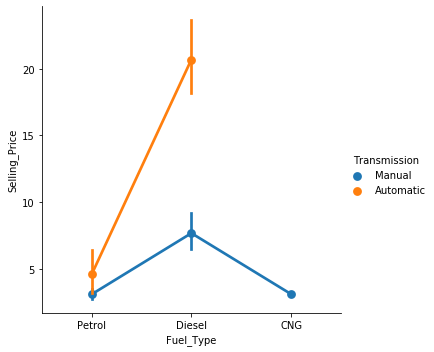

In [13]:
sns.catplot(data=cdata,x='Fuel_Type' ,y='Selling_Price',kind='point',hue='Transmission')


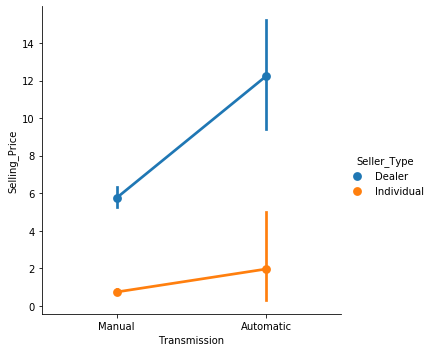

In [14]:
sns.catplot(data=cdata,x='Transmission' ,y='Selling_Price',kind='point',hue='Seller_Type')

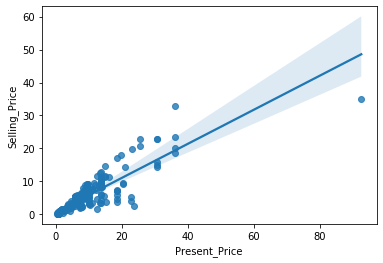

In [15]:
sns.regplot(data=cdata,x='Present_Price' ,y='Selling_Price')


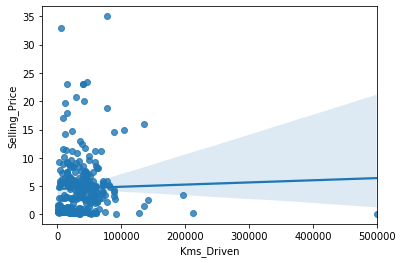

In [16]:

sns.regplot(data=cdata,x='Kms_Driven' ,y='Selling_Price')

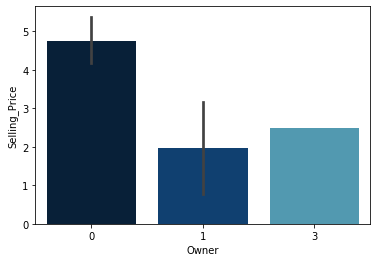

In [17]:
sns.barplot('Owner','Selling_Price',data=cdata,palette='ocean')

<Figure size 720x360 with 0 Axes>

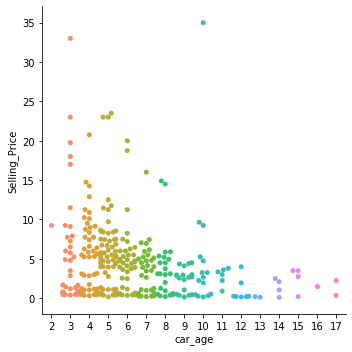

In [18]:
plt.figure(figsize=(10,5))
sns.catplot('car_age','Selling_Price',data=cdata, kind='swarm')

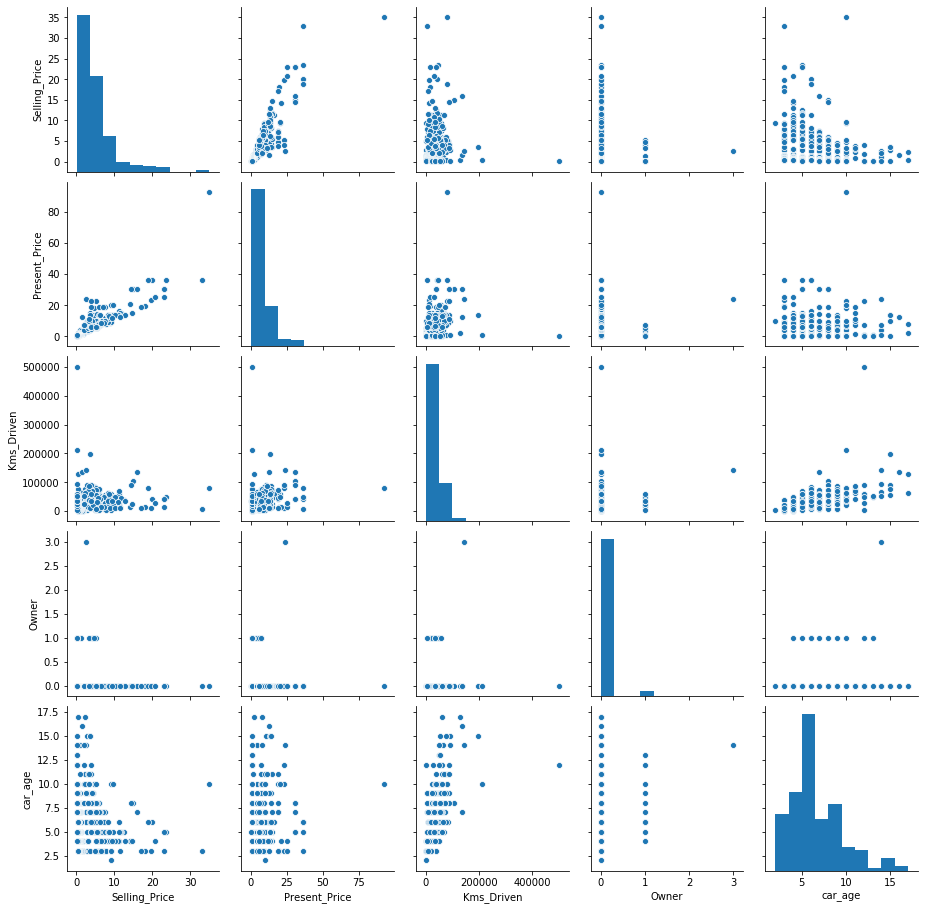

In [19]:
sns.pairplot(cdata)

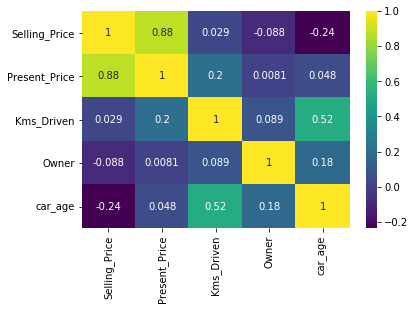

In [20]:
sns.heatmap(cdata.corr(),cmap='viridis',annot=True)

#### Present price show high positive correlation

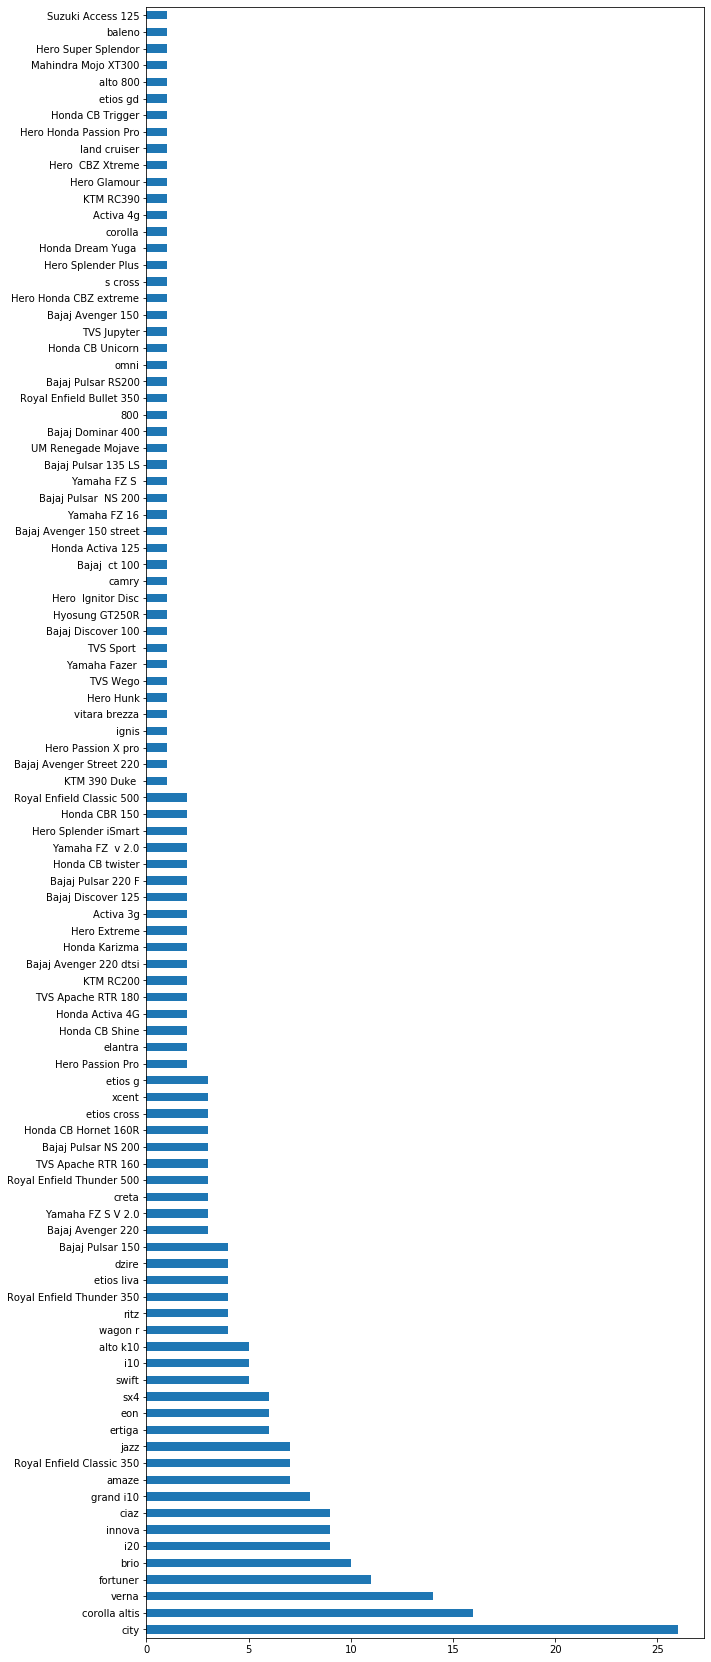

In [21]:
plt.figure(figsize=(10,30))
c=cdata.Car_Name.value_counts().plot.barh()


In [22]:
cdata.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [23]:
dummy=pd.get_dummies(cdata[['Fuel_Type','Seller_Type','Transmission']],drop_first=True)
cdummy=pd.concat([cdata,dummy],axis=1)
cdummy.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6,0,1,0,1
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7,1,0,0,1
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3,0,1,0,1
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9,0,1,0,1
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6,1,0,0,1


In [24]:
cdummy=cdummy.drop(['Fuel_Type','Seller_Type','Transmission'],axis=1)


In [25]:
cdummy.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,3.35,5.59,27000,0,6,0,1,0,1
1,sx4,4.75,9.54,43000,0,7,1,0,0,1
2,ciaz,7.25,9.85,6900,0,3,0,1,0,1
3,wagon r,2.85,4.15,5200,0,9,0,1,0,1
4,swift,4.60,6.87,42450,0,6,1,0,0,1


In [26]:
cdummy=cdummy.drop(['Car_Name'],axis=1)

In [27]:
y=cdummy['Selling_Price']

In [28]:
cdummy.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'car_age',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [29]:
X=cdummy[['Present_Price', 'Kms_Driven', 'Owner', 'car_age',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual']]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [31]:
scaler = StandardScaler()

X_train[['Present_Price', 'Kms_Driven', 'Owner', 'car_age']] = scaler.fit_transform(X_train[['Present_Price', 'Kms_Driven', 'Owner', 'car_age']])
X_train.head()

,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
156,-0.787736,-0.556284,-0.185695,-1.214860,0,1,1,1
98,1.156937,0.131253,-0.185695,0.119104,0,1,0,1
276,0.618363,-0.331688,-0.185695,-0.547878,0,1,0,1
203,-0.349136,0.325138,-0.185695,0.786086,0,1,0,1
123,-0.685611,0.165630,-0.185695,0.119104,0,1,1,1


In [32]:
### Modeling

In [33]:
X_train_sm=sm.add_constant(X_train)

In [34]:
lr=sm.OLS(y_train,X_train_sm)

In [35]:
lr_model=lr.fit()

In [36]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     215.4
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           3.22e-94
Time:                        22:55:08   Log-Likelihood:                -401.23
No. Observations:                 210   AIC:                             820.5
Df Residuals:                     201   BIC:                             850.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.5522      1.710      3.247      0.001       2.181       8.923
Present_Price              3.7562      0.155     24.304      0.000       3.451       4.061
Kms_Driven                -0.2083      0.139     -1.497      0.136      -0.483       0.066
Owner                      0.1066      0.117      0.914      0.362      -0.123       0.337
car_age                   -1.1518      0.137     -8.399      0.000      -1.422      -0.881
Fuel_Type_Diesel           2.4632      1.704      1.446      0.150      -0.896       5.823
Fuel_Type_Petrol           0.4129      1.683      0.245      0.806      -2.907       3.733
Seller_Type_Individual    -1.1226      0.284     -3.952      0.000      -1.683      -0.562
Transmission_Manual       -1.5823      0.352     -4.501      0.000      -2.275      -0.889
==============================================================================
Omnibus:                       32.880   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.563
Skew:                           0.614   Prob(JB):                     3.96e-22
Kurtosis:                       6.123   Cond. No.                         41.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
7,Transmission_Manual,7.59
5,Fuel_Type_Petrol,7.00
4,Fuel_Type_Diesel,2.98
6,Seller_Type_Individual,2.14
0,Present_Price,1.79
1,Kms_Driven,1.45
3,car_age,1.41
2,Owner,1.02


In [38]:
### removing Fuel_type_petrol as High P value and VIF is also high
X_train=X_train.drop(['Fuel_Type_Petrol'],axis=1)

In [39]:
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     247.4
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           2.03e-95
Time:                        22:55:08   Log-Likelihood:                -401.26
No. Observations:                 210   AIC:                             818.5
Df Residuals:                     202   BIC:                             845.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.9628      0.347     17.201      0.000       5.279       6.646
Present_Price              3.7565      0.154     24.363      0.000       3.452       4.061
Kms_Driven                -0.2082      0.139     -1.500      0.135      -0.482       0.065
Owner                      0.1071      0.116      0.920      0.359      -0.122       0.337
car_age                   -1.1534      0.137     -8.440      0.000      -1.423      -0.884
Fuel_Type_Diesel           2.0538      0.341      6.028      0.000       1.382       2.726
Seller_Type_Individual    -1.1180      0.283     -3.953      0.000      -1.676      -0.560
Transmission_Manual       -1.5846      0.351     -4.520      0.000      -2.276      -0.893
==============================================================================
Omnibus:                       32.851   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.969
Skew:                           0.616   Prob(JB):                     5.32e-22
Kurtosis:                       6.111   Cond. No.                         5.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
6,Transmission_Manual,1.93
5,Seller_Type_Individual,1.81
4,Fuel_Type_Diesel,1.72
0,Present_Price,1.62
1,Kms_Driven,1.44
3,car_age,1.40
2,Owner,1.02


In [41]:
### removing Owner as High P value 
X_train=X_train.drop(['Owner'],axis=1)

In [42]:
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     288.7
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           1.74e-96
Time:                        22:55:09   Log-Likelihood:                -401.70
No. Observations:                 210   AIC:                             817.4
Df Residuals:                     203   BIC:                             840.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.9476      0.346     17.183      0.000       5.265       6.630
Present_Price              3.7553      0.154     24.365      0.000       3.451       4.059
Kms_Driven                -0.2158      0.139     -1.558      0.121      -0.489       0.057
car_age                   -1.1439      0.136     -8.398      0.000      -1.412      -0.875
Fuel_Type_Diesel           2.0412      0.340      5.998      0.000       1.370       2.712
Seller_Type_Individual    -1.1067      0.282     -3.918      0.000      -1.664      -0.550
Transmission_Manual       -1.5685      0.350     -4.481      0.000      -2.259      -0.878
==============================================================================
Omnibus:                       32.782   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.825
Skew:                           0.614   Prob(JB):                     5.72e-22
Kurtosis:                       6.110   Cond. No.                         5.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
5,Transmission_Manual,1.93
4,Seller_Type_Individual,1.81
3,Fuel_Type_Diesel,1.71
0,Present_Price,1.61
1,Kms_Driven,1.43
2,car_age,1.40


In [44]:
### removing Kms_Driven as High P value 
X_train=X_train.drop(['Kms_Driven'],axis=1)

In [45]:
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     343.5
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           2.98e-97
Time:                        22:55:09   Log-Likelihood:                -402.95
No. Observations:                 210   AIC:                             817.9
Df Residuals:                     204   BIC:                             838.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.8878      0.345     17.056      0.000       5.207       6.568
Present_Price              3.7490      0.155     24.248      0.000       3.444       4.054
car_age                   -1.2536      0.117    -10.711      0.000      -1.484      -1.023
Fuel_Type_Diesel           1.9529      0.337      5.800      0.000       1.289       2.617
Seller_Type_Individual    -1.1053      0.283     -3.900      0.000      -1.664      -0.546
Transmission_Manual       -1.4782      0.346     -4.268      0.000      -2.161      -0.795
==============================================================================
Omnibus:                       35.022   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.618
Skew:                           0.663   Prob(JB):                     1.92e-23
Kurtosis:                       6.194   Cond. No.                         5.90
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
4,Transmission_Manual,1.89
3,Seller_Type_Individual,1.80
2,Fuel_Type_Diesel,1.65
0,Present_Price,1.61
1,car_age,1.03


In [47]:
X_train.columns

Index(['Present_Price', 'car_age', 'Fuel_Type_Diesel',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

In [48]:
### all below feature- 'Present_Price', 'car_age', 'Fuel_Type_Diesel', 'Seller_Type_Individual', 'Transmission_Manual' are 
## significant to predict selling price with p values at 0  and R2 of 89.4%

In [49]:
### residual Analysis

In [50]:
y_train_pred=lr_model.predict(X_train_sm)

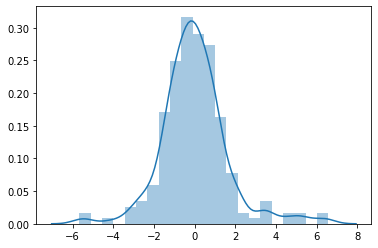

In [51]:
###Residual are y_train- y-train_pred
res=y_train-y_train_pred
sns.distplot(res)

In [52]:
##residual are normally distributed that is all error terms are normally distributed

In [53]:
tablex=X_test.copy()
tablex

,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
199,0.58,53000,0,13,0,1,1,1
201,6.79,58000,1,10,1,0,0,1
111,1.50,8700,0,4,0,1,1,1
125,1.75,40000,0,11,0,1,1,1
46,4.89,64532,0,7,0,1,0,1
...,...,...,...,...,...,...,...,...
230,9.40,45000,0,7,1,0,0,1
29,10.38,45000,0,5,1,0,0,1
136,1.20,23500,0,6,0,1,1,1
132,0.95,3500,0,3,0,1,1,1


In [54]:
### making prediction on test set

In [55]:
scaler = StandardScaler()

X_test[['Present_Price', 'Kms_Driven', 'Owner', 'car_age']] = scaler.fit_transform(X_test[['Present_Price', 'Kms_Driven', 'Owner', 'car_age']])
X_test.head()

,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
199,-0.961777,0.913118,-0.184637,2.899985,0,1,1,1
201,-0.048861,1.126266,2.615694,1.700446,1,0,0,1
111,-0.826530,-0.975375,-0.184637,-0.698633,0,1,1,1
125,-0.789778,0.358933,-0.184637,2.100293,0,1,1,1
46,-0.328175,1.404723,-0.184637,0.500907,0,1,0,1


In [56]:
col=X_train.columns
col

Index(['Present_Price', 'car_age', 'Fuel_Type_Diesel',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

In [57]:
X_test=X_test[col]

In [58]:
X_test_sm=sm.add_constant(X_test)


In [59]:
y_test_pred=lr_model.predict(X_test_sm)

In [60]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8748700136462051

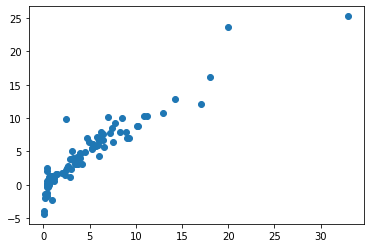

In [61]:
plt.scatter(y_test,y_test_pred)

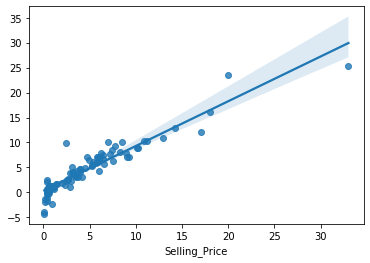

In [62]:
sns.regplot(y_test ,y_test_pred)

In [63]:
### Model learn on training is able to learn on test set  as training set R2 was 89.4% whereas test set R2 is 87.4%.
### present price is important feature with high  co eff which effect price prediction much more than other features

In [64]:
y_test_pred=pd.Series(y_test_pred,name="pred")

In [65]:
tablex=pd.concat([tablex,y_test,y_test_pred],axis=1)

In [67]:
tablex

,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Selling_Price,pred
199,0.58,53000,0,13,0,1,1,1,0.12,-3.936670
201,6.79,58000,1,10,1,0,0,1,3.25,4.047718
111,1.50,8700,0,4,0,1,1,1,1.15,1.081436
125,1.75,40000,0,11,0,1,1,1,0.90,-2.289394
46,4.89,64532,0,7,0,1,0,1,2.65,2.551363
...,...,...,...,...,...,...,...,...,...,...
230,9.40,45000,0,7,1,0,0,1,6.15,6.989844
29,10.38,45000,0,5,1,0,0,1,7.45,8.532407
136,1.20,23500,0,6,0,1,1,1,0.65,-0.086362
132,0.95,3500,0,3,0,1,1,1,0.75,1.279548


In [68]:
file=open('Linear_regression.pkl','wb')
pickle.dump(lr_model,file)

In [69]:
lr_model.params

const                     5.887840
Present_Price             3.748960
car_age                  -1.253557
Fuel_Type_Diesel          1.952909
Seller_Type_Individual   -1.105304
Transmission_Manual      -1.478246
dtype: float64